# HITTERS DATA

In [26]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from IPython.display import Image 

In [29]:
Hitters = pd.read_csv(r"C:\Users\Vaibhav\Desktop\BA\Datasets\Hitters.csv",index_col=0)

In [30]:
Hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [31]:
Hitters.index.name = 'Player'

In [32]:
Hitters.shape

(322, 20)

In [33]:
Hitters.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [34]:
type(Hitters)

pandas.core.frame.DataFrame

#### Drop the na values

In [35]:
Hitters = Hitters.dropna()

In [36]:
Hitters.shape

(263, 20)

In [37]:
Hitters.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [38]:
Hitters['logSalary'] = np.log(Hitters.Salary)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002250A9188D0>]],
      dtype=object)

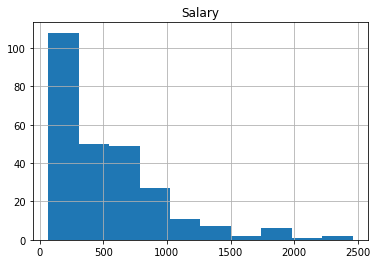

In [39]:
%matplotlib inline
Hitters.hist('Salary')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002250A9E0F28>]],
      dtype=object)

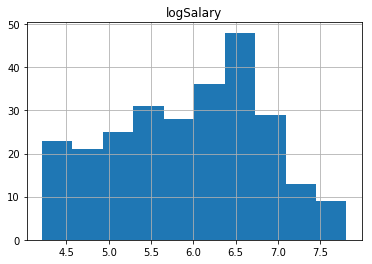

In [40]:
Hitters.hist('logSalary')

In [41]:
Hitters.columns.difference(['Salary']) #gives other vars except sal

Index(['Assists', 'AtBat', 'CAtBat', 'CHits', 'CHmRun', 'CRBI', 'CRuns',
       'CWalks', 'Division', 'Errors', 'Hits', 'HmRun', 'League', 'NewLeague',
       'PutOuts', 'RBI', 'Runs', 'Walks', 'Years', 'logSalary'],
      dtype='object')

In [42]:
del Hitters['Salary']

In [43]:
y=Hitters['logSalary']

In [44]:
#This implies all columns except logSalary
X = Hitters[Hitters.columns.difference(['logSalary'])]
X.head()

,Assists,AtBat,CAtBat,CHits,CHmRun,CRBI,CRuns,CWalks,Division,Errors,Hits,HmRun,League,NewLeague,PutOuts,RBI,Runs,Walks,Years
Player,,,,,,,,,,,,,,,,,,,
-Alan Ashby,43,315,3449,835,69,414,321,375,W,10,81,7,N,N,632,38,24,39,14
-Alvin Davis,82,479,1624,457,63,266,224,263,W,14,130,18,A,A,880,72,66,76,3
-Andre Dawson,11,496,5628,1575,225,838,828,354,E,3,141,20,N,N,200,78,65,37,11
-Andres Galarraga,40,321,396,101,12,46,48,33,E,4,87,10,N,N,805,42,39,30,2
-Alfredo Griffin,421,594,4408,1133,19,336,501,194,W,25,169,4,A,A,282,51,74,35,11


In [45]:
X = pd.get_dummies(X,columns=['League','Division','NewLeague'],drop_first=True) 
#drop_first = T will be creating n-1 levels and will drop the original League, Division and NewLeague vars

In [46]:
X.head(3)

,Assists,AtBat,CAtBat,CHits,CHmRun,CRBI,CRuns,CWalks,Errors,Hits,HmRun,PutOuts,RBI,Runs,Walks,Years,League_N,Division_W,NewLeague_N
Player,,,,,,,,,,,,,,,,,,,
-Alan Ashby,43,315,3449,835,69,414,321,375,10,81,7,632,38,24,39,14,1,1,1
-Alvin Davis,82,479,1624,457,63,266,224,263,14,130,18,880,72,66,76,3,0,1,0
-Andre Dawson,11,496,5628,1575,225,838,828,354,3,141,20,200,78,65,37,11,1,0,1


In [49]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
p = sc.fit_transform(X)
X = pd.DataFrame(data = p, columns=X.columns)

In [50]:
X.head(3)

,Assists,AtBat,CAtBat,CHits,CHmRun,CRBI,CRuns,CWalks,Errors,Hits,HmRun,PutOuts,RBI,Runs,Walks,Years,League_N,Division_W,NewLeague_N
0,0.087398,0.443114,0.244406,0.195437,0.125912,0.248188,0.147480,0.238978,0.31250,0.337553,0.175,0.458969,0.314050,0.184615,0.371429,0.565217,1.0,1.0,1.0
1,0.166667,0.688623,0.114365,0.106538,0.114964,0.158816,0.102635,0.167412,0.43750,0.544304,0.450,0.639070,0.595041,0.507692,0.723810,0.086957,0.0,1.0,0.0
2,0.022358,0.714072,0.399672,0.369473,0.410584,0.504227,0.381877,0.225559,0.09375,0.590717,0.500,0.145243,0.644628,0.500000,0.352381,0.434783,1.0,0.0,1.0


In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((210, 19), (53, 19), (210,), (53,))

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
model1 = DecisionTreeRegressor(max_depth=4) 
#this is called as hyper-parameter - the arguments required to build the model

In [56]:
model1.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [57]:
from sklearn.tree import export_graphviz

In [58]:
#from sklearn.externals.six import StringIO  
from IPython.display import Image  

In [59]:
#export_graphviz(model1,out_file='tree.dot',feature_names=Hitters.columns.difference(['Salary','League','NewLeague','Division'
#]))  
export_graphviz(model1,out_file='tree.dot',feature_names=X_train.columns) 

In [60]:
! dot -Tpng tree.dot -o tree.png

In [61]:
# Run this command in cmd prompt after installing graphviz 
#cd and reach the directory where dot file is there
#"dot -Tpng tree.dot -o tree2.png"

In [62]:
from IPython.display import Image  
#Image("tree2.png")

##### Calculate R sq

In [63]:
model1.score(X_train, y_train)

0.8759289524311671

In [64]:
y_pred_test = model1.predict(X_test)
y_pred_test

array([6.80450404, 6.80450404, 6.80450404, 4.6550946 , 6.60068108,
       5.73328682, 5.09377611, 4.6550946 , 6.80450404, 6.60068108,
       6.24552582, 6.80450404, 5.57273279, 5.09377611, 5.73328682,
       6.60068108, 6.80450404, 4.6550946 , 6.80450404, 5.23059884,
       5.57273279, 6.24552582, 6.16725494, 6.24552582, 6.24552582,
       4.33172598, 6.80450404, 6.16725494, 5.57273279, 4.6550946 ,
       4.6550946 , 6.82437367, 6.16725494, 5.23059884, 5.73328682,
       5.57273279, 6.80450404, 5.09377611, 4.33172598, 6.16725494,
       4.33172598, 5.09377611, 6.80450404, 6.16725494, 6.80450404,
       6.80450404, 6.16725494, 4.6550946 , 5.09377611, 6.24552582,
       6.80450404, 6.16725494, 6.80450404])

In [65]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test) #preferred to use this fn on train data not test data

0.639316261777485

This is how we find the R2 for the test data

In [66]:
SSE = np.sum((y_pred_test - y_test)**2)
SST = np.sum((y_test - np.mean(y_train))**2)
R2 = 1-SSE/SST
R2 #roughly same value

0.6394623405615987

### Hyper-Parameter Tuning

In [67]:
parameters = {'max_depth': [1,2,3,4,5,6,7,8,9,10]} #max_dept
grid = GridSearchCV(model1, parameters, cv = 10, scoring = 'r2')

In [68]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [69]:
grid.best_params_ #best parameter of depth

{'max_depth': 3}

In [ ]:
grid.best_score_ #R2 for the best model 
#r2 bw 0 to 1

In [70]:
np.random.seed(42)

In [71]:
scores = cross_val_score(model1, X_train, y_train, cv=5,scoring='r2')                                            

In [72]:
scores.mean()

0.5401392203132586

---

## RANDOM FOREST REGRESSOR

In [73]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=50,max_features=12,random_state=42,oob_score=True,verbose=0,max_depth=6)
#n_estimators = number of trees to be created
#max_features = randomly 12 features need to be taken to create our forest. gen underroot p features taken
#oob score is out of bag score needs to be calculated - 
#          oob score refers to the aggregated R2 obtained from out of bag data
#hyper-parameters are the parameters that need to be defined (randomly) to build model

In [74]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features=12, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [75]:
model.oob_score_ #oob accuracy - the R2 obtained from predictions on oob data

0.7281312570334788

In [76]:
model.score(X_train,y_train) #gives the accuracy score R2 / classification accuracy after fitting the model on train data / test data

0.9394757319534324

In [77]:
model.feature_importances_

array([0.00538278, 0.03225528, 0.38696777, 0.08796581, 0.02317414,
       0.07290324, 0.17882961, 0.06307716, 0.00463091, 0.03782961,
       0.00617099, 0.01973727, 0.03094316, 0.01352474, 0.02368201,
       0.009858  , 0.00065249, 0.00080346, 0.00161156])

In [78]:
data = pd.Series(model.feature_importances_, index=X_train.columns)
data

Assists        0.005383
AtBat          0.032255
CAtBat         0.386968
CHits          0.087966
CHmRun         0.023174
CRBI           0.072903
CRuns          0.178830
CWalks         0.063077
Errors         0.004631
Hits           0.037830
HmRun          0.006171
PutOuts        0.019737
RBI            0.030943
Runs           0.013525
Walks          0.023682
Years          0.009858
League_N       0.000652
Division_W     0.000803
NewLeague_N    0.001612
dtype: float64

In [79]:
data.sort_values(ascending=True,inplace=True)
data

League_N       0.000652
Division_W     0.000803
NewLeague_N    0.001612
Errors         0.004631
Assists        0.005383
HmRun          0.006171
Years          0.009858
Runs           0.013525
PutOuts        0.019737
CHmRun         0.023174
Walks          0.023682
RBI            0.030943
AtBat          0.032255
Hits           0.037830
CWalks         0.063077
CRBI           0.072903
CHits          0.087966
CRuns          0.178830
CAtBat         0.386968
dtype: float64

In [80]:
import matplotlib.pyplot as plt

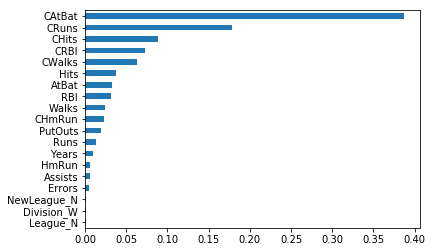

In [81]:
data.plot.barh()

In [82]:
from sklearn.metrics import r2_score,mean_squared_error

In [83]:
y_pred = model.predict(X_test)

In [84]:
r2_score(y_test,y_pred)

0.6858780460225522

In [85]:
SSE = mean_squared_error(y_test,y_pred)*y_test.shape[0]
SSE

10.719217649872299

In [86]:
SST = np.sum((y_test-np.mean(y_train))**2)
SST

34.138208462647825

In [87]:
R2 = 1 - SSE/SST
R2

0.6860052670426251

In [88]:
RMSE  = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

0.4497214578160932

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
parameters = {'max_depth': np.arange(4,7),'max_features':np.arange(12,14)}

In [91]:
tune_model = GridSearchCV(model, parameters,cv=5) #if n_estimator = 200, 200 trees for each fold * 5 folds = 1000 trees
#so 1000 trees for each hyper-parameter selection - since 3 X 4 = 12 hyper-parameters selected
#so total 12000 trees will be constructed

In [92]:
tune_model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features=12, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([4, 5, 6]), 'max_features': array([12, 13])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [93]:
tune_model.best_params_

{'max_depth': 6, 'max_features': 13}

In [94]:
y_pred_cv = tune_model.predict(X_test)

In [95]:
np.sqrt(mean_squared_error(y_pred_cv,y_test))

0.44591985686999974

In [96]:
SSE = np.sum((y_pred_cv - y_test)**2)
SSE

10.538759493800937

In [97]:
SST = np.sum((y_test - np.mean(y_train))**2)
SST

34.138208462647825

In [98]:
R2 = 1-SSE/SST
R2

0.6912913720902526

----

### Bagging Regressor using Linear Regression
- Bagging can be applied on decision trees or any ml model. The idea is take 2-third of training data and train the ml model (dec tree / lo re) and test on test data. Then the next sample with replacement of 2/3rd of training data to train the ml model and validated on test data. The final predictions are calculated using aggregations. The total number of models (dec trees) to be made can be pre-defined. 

In [99]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [100]:
X_train.head(2)

,Assists,AtBat,CAtBat,CHits,CHmRun,CRBI,CRuns,CWalks,Errors,Hits,HmRun,PutOuts,RBI,Runs,Walks,Years,League_N,Division_W,NewLeague_N
180,0.932927,0.790419,0.072609,0.062794,0.005474,0.046498,0.058715,0.014696,0.6875,0.573840,0.05,0.189542,0.388430,0.446154,0.114286,0.043478,0.0,1.0,0.0
175,0.002033,0.419162,0.039974,0.036689,0.014599,0.018116,0.031900,0.027476,0.0625,0.312236,0.15,0.153958,0.190083,0.292308,0.247619,0.086957,1.0,0.0,1.0


In [101]:
model_bag = BaggingRegressor(base_estimator= DecisionTreeRegressor(max_depth = 3),n_estimators=500,oob_score=True,random_state=42,max_features=19)
#max_features can be specified if required for bagging also. sklearn supports that

#model_bag1 = BaggingRegressor(base_estimator= LinearRegression(),n_estimators=500,oob_score=True,random_state=42,max_features=19)
#base estimator can be any regressor like LinearRegression()

#Similarly we can have BaggingClassifier

In [102]:
model_bag.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=19,
         max_samples=1.0, n_estimators=500, n_jobs=1, oob_score=True,
         random_state=42, verbose=0, warm_start=False)

In [103]:
model_bag.oob_score_

0.7311530712417701

In [104]:
y_pred =model_bag.predict(X_test)

In [105]:
model_bag.score(X_train, y_train) #R2 on test data

0.8512421127700944

In [106]:
model_bag.score(X_test, y_test)

0.6518010656935155

In [107]:
from sklearn.metrics import r2_score

In [108]:
r2_score(y_test, y_pred)

0.6221822450998213

----

### SUPPORT VECTOR REGRESSOR LINEAR

In [109]:
from sklearn.svm import LinearSVR

In [124]:
mod = LinearSVR(C = 10)

In [125]:
mod.fit(X_train, y_train)

LinearSVR(C=10, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [126]:
mod.score(X_train, y_train)

0.5409964199555246

In [127]:
y_pred = mod.predict(X_test)
y_pred

array([6.76195598, 6.88457076, 6.72213469, 5.6514603 , 5.80816653,
       5.2269247 , 6.4621064 , 5.52491535, 6.93952001, 6.46088397,
       6.23616127, 7.05153545, 6.15866559, 5.70817349, 5.39800971,
       6.51293319, 6.83724126, 4.67109627, 6.82025094, 5.5582514 ,
       5.71555644, 6.64812448, 6.20412159, 6.04086672, 6.59159481,
       4.53447032, 7.34112652, 5.34850177, 7.16598961, 4.71421061,
       4.72072082, 4.17799291, 5.69311299, 5.92775739, 5.3997288 ,
       6.3244395 , 7.44192845, 5.53326432, 4.71807493, 5.43560377,
       4.37497329, 5.349213  , 5.90281739, 5.89920947, 6.99386064,
       6.85462965, 5.9003643 , 5.00975827, 5.40594842, 6.31455276,
       7.33062748, 6.07146154, 6.3332174 ])

In [128]:
r2_score(y_pred, y_test)

0.19026585482678982

---

### SUPPORT VECTOR REGRESSOR - RADIAL

In [129]:
from sklearn.svm import SVR

In [160]:
mod = SVR(kernel = "rbf", C = 10, gamma = .1)

In [161]:
mod.fit(X_train, y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [162]:
mod.score(X_train, y_train)

0.7512635744964895

In [171]:
y_pred =  mod.predict(X_test)
y_pred

array([6.67907751, 6.72232997, 7.026993  , 5.46935884, 6.18268114,
       5.45563839, 5.8421494 , 5.18453316, 7.09686637, 6.2422609 ,
       6.25522862, 6.94681802, 6.32721442, 5.5577256 , 5.50273889,
       6.72010262, 6.70299365, 4.73609341, 7.0772141 , 5.59232256,
       6.27937825, 6.19787971, 6.37601112, 5.99447751, 6.41503539,
       4.60169535, 6.81245297, 5.3491542 , 6.38346182, 4.70034826,
       4.82452376, 4.32606287, 5.99418609, 5.77179157, 5.29324786,
       6.61750738, 7.20461905, 5.19844265, 4.43191702, 5.62262067,
       4.46404085, 5.15092678, 6.36407084, 6.15989173, 7.09787644,
       6.70835931, 6.07843232, 4.78469044, 5.22519356, 6.35099082,
       6.91375793, 5.85145711, 6.47115516])

In [172]:
r2_score(y_test, y_pred)

0.39011467648746023

In [165]:
parameters = {'C': [.01,.1,1,10,100,1000], 'gamma': [.0001, .001, .01, .1]} #max_dept
grid = GridSearchCV(mod, parameters, cv = 10, scoring = 'r2')

In [166]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [167]:
grid.best_params_ #best parameter of depth

{'C': 10, 'gamma': 0.1}

In [168]:
grid.best_score_ #Average R2 for the best model for 10 crossvalidation test sets
#r2 bw 0 to 1

0.5684114799712547